# 1. Install Dependencies and Setup

In [3]:
! pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached numpy-1.26.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
 

In [4]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.47.2
gast                         0.5.4
google-auth                  2.27.0
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
ipykernel                    6.29.0
ipython                      8.20.0
jedi                         0.19.1
jupyter_client               8.6.0
jupyter_core                 5.7.

In [5]:
import tensorflow as tf
import os

2024-01-29 17:00:35.267187: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-29 17:00:35.268875: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 17:00:35.293218: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 17:00:35.293243: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 17:00:35.293997: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [8]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [9]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [10]:
import cv2
import imghdr

In [11]:
data_dir = "data"

In [12]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 305 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

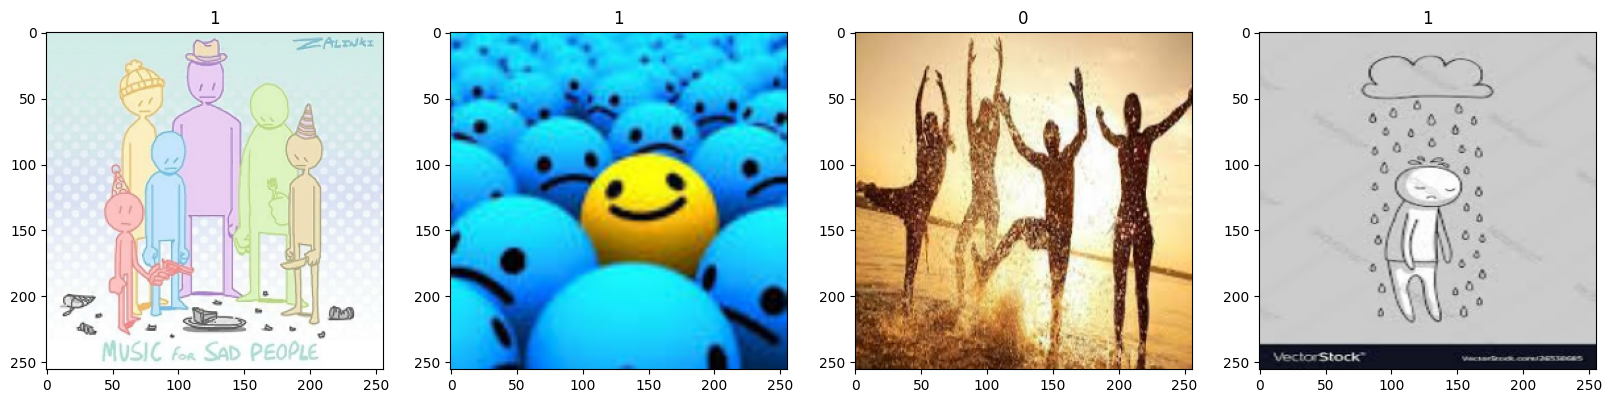

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [19]:
data = data.map(lambda x, y: (x / 255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[0.54799515, 0.55975986, 0.5166226 ],
          [0.55464345, 0.56640816, 0.5232709 ],
          [0.5629902 , 0.5747549 , 0.53161764],
          ...,
          [0.34515738, 0.35029298, 0.29567248],
          [0.3006836 , 0.30852672, 0.25754634],
          [0.34730393, 0.35514706, 0.30416667]],
 
         [[0.5534409 , 0.56520563, 0.5220684 ],
          [0.54850835, 0.56027305, 0.5171358 ],
          [0.5599743 , 0.571739  , 0.52860177],
          ...,
          [0.293233  , 0.3242379 , 0.2605737 ],
          [0.33477902, 0.34268343, 0.28759766],
          [0.28962162, 0.29752603, 0.24244025]],
 
         [[0.5408586 , 0.55262333, 0.5094861 ],
          [0.5672526 , 0.5790173 , 0.53588   ],
          [0.56078434, 0.57254905, 0.5294118 ],
          ...,
          [0.28908932, 0.31671453, 0.25372818],
          [0.31755897, 0.32932368, 0.2598384 ],
          [0.23685087, 0.24861558, 0.17913029]],
 
         ...,
 
         [[0.63856655, 0.65033126, 0.6228803 ],
          [0.66726

# 5. Split Data

In [21]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

In [22]:
train_size

7

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# 6. Build Deep Learning Model

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [28]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [30]:
logdir = "logs"

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(
    train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]
)

Epoch 1/20
7/7 [==============================] - 4s 407ms/step - loss: 1.0083 - accuracy: 0.5402 - val_loss: 0.6745 - val_accuracy: 0.4844
Epoch 2/20
7/7 [==============================] - 4s 404ms/step - loss: 0.6706 - accuracy: 0.5759 - val_loss: 0.6484 - val_accuracy: 0.6719
Epoch 3/20
7/7 [==============================] - 4s 405ms/step - loss: 0.6195 - accuracy: 0.6964 - val_loss: 0.5209 - val_accuracy: 0.6875
Epoch 4/20
7/7 [==============================] - 4s 393ms/step - loss: 0.5708 - accuracy: 0.7232 - val_loss: 0.5481 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 4s 398ms/step - loss: 0.4774 - accuracy: 0.8393 - val_loss: 0.3703 - val_accuracy: 0.8594
Epoch 6/20
7/7 [==============================] - 4s 393ms/step - loss: 0.4844 - accuracy: 0.7589 - val_loss: 0.3823 - val_accuracy: 0.8281
Epoch 7/20
7/7 [==============================] - 3s 377ms/step - loss: 0.3688 - accuracy: 0.8973 - val_loss: 0.2873 - val_accuracy: 0.9375
Epoch 8/20
7/7 [====

# 8. Plot Performance

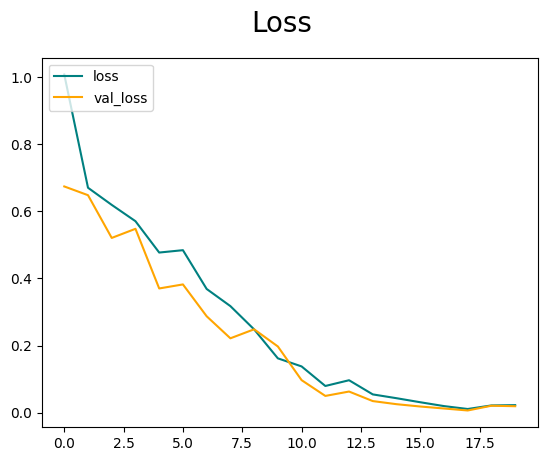

In [35]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

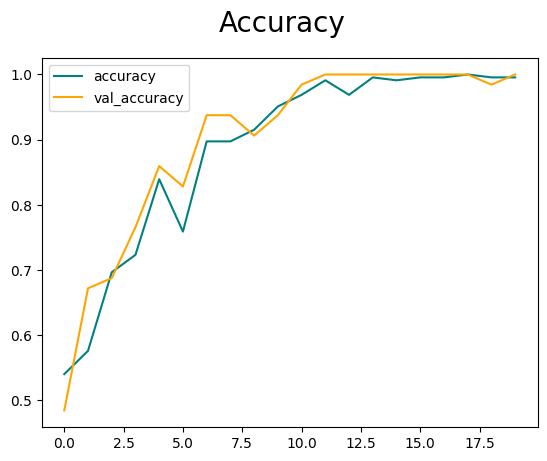

In [36]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 92ms/step


In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [41]:
import cv2

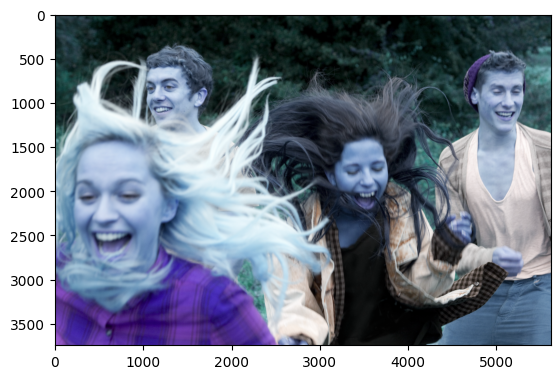

In [42]:
img = cv2.imread("154006829.jpg")
plt.imshow(img)
plt.show()

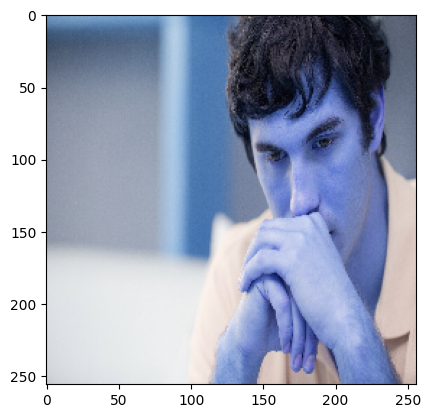

In [47]:
resize = tf.image.resize(cv2.imread("8iAb9k4aT.jpg"), (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 14ms/step


In [49]:
yhat

array([[0.9027909]], dtype=float32)

In [50]:
if yhat > 0.5:
    print(f"Predicted class is Sad")
else:
    print(f"Predicted class is Happy")

Predicted class is Sad


# 11. Save the Model

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model.save(os.path.join("models", "imageclassifier.h5"))

/home/dell/Documents/Projects/AI/ImageClassification/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
new_model = load_model("./models/imageclassifier.h5")

In [56]:
new_model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 50ms/step


array([[0.9027909]], dtype=float32)